<a href="https://colab.research.google.com/github/kzengg/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA

#Data Set 1

**Source:** https://www.kaggle.com/datasets/karthikbhandary2/property-rentals

**Description:** This data set contains data on different properties. It includes details about each property rented, as well as the price charged per night. It includes 9 columns.

**Target:** Price per night

**Classification/Regression:** Regression

**Features:** 5

**# of Rows:** 2222

**Possible Challenges:** Majority of the data is skewed towards 4 property types. 

In [182]:
dataset1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQklOtJEwS6tKqnELsZLnmHyHf9l3zakWMlWR5A3_xFaxjJdlT5WjpocMv2Mhay5pxrSX3LFF6aRND7/pub?output=csv'

#Dataset Information

In [183]:
df = pd.read_csv(dataset1)
df.head()

,id,latitude,longitude,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,958,37.76931,-122.43386,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,3850,37.75402,-122.45805,House,Private room,1.0,1.0,1,$99.00
2,5858,37.74511,-122.42102,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,7918,37.76669,-122.45250,Apartment,Private room,4.0,1.0,32,$65.00
4,8142,37.76487,-122.45183,Apartment,Private room,4.0,1.0,32,$65.00


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2222 non-null   int64  
 1   latitude        2222 non-null   float64
 2   longitude       2222 non-null   float64
 3   property_type   2222 non-null   object 
 4   room_type       2222 non-null   object 
 5   bathrooms       2211 non-null   float64
 6   bedrooms        2221 non-null   float64
 7   minimum_nights  2222 non-null   int64  
 8   price           2222 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 156.4+ KB


In [185]:
#checking for consistencies
df['room_type'].value_counts()

Entire home/apt    1383
Private room        778
Shared room          53
Hotel room            8
Name: room_type, dtype: int64

In [186]:
#check for duplicates
df.duplicated().sum()

0

In [187]:
#checking for missing
df.isna().sum()

id                 0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         11
bedrooms           1
minimum_nights     0
price              0
dtype: int64

In [188]:
#view the data where null is true
print(df[df['bathrooms'].isnull()])

          id  latitude  longitude property_type        room_type  bathrooms  \
139   144978  37.79336 -122.42506     Apartment     Private room        NaN   
181   229240  37.79341 -122.40340        Hostel      Shared room        NaN   
196   259621  37.79470 -122.40374        Hostel      Shared room        NaN   
197   259622  37.79441 -122.40473        Hostel      Shared room        NaN   
267   430692  37.75906 -122.40761     Apartment     Private room        NaN   
352   596042  37.79384 -122.42436     Apartment     Private room        NaN   
434   785901  37.79313 -122.40443        Hostel      Shared room        NaN   
435   786492  37.79421 -122.40310        Hostel      Shared room        NaN   
436   786506  37.79260 -122.40339        Hostel      Shared room        NaN   
539  1031899  37.74833 -122.42621     Apartment  Entire home/apt        NaN   
606  1206233  37.77028 -122.44757     Apartment     Private room        NaN   

     bedrooms  minimum_nights    price  
139       

#Cleaning Up Data

In [189]:
#Based on my observation on property type, missing values for bathrooms and bedrooms are meant to be 0. 
df['bathrooms'].fillna(value = 0, inplace = True)
df['bedrooms'].fillna(value = 0, inplace = True)
df.isna().sum()

id                0
latitude          0
longitude         0
property_type     0
room_type         0
bathrooms         0
bedrooms          0
minimum_nights    0
price             0
dtype: int64

In [190]:
#ID, Latitude, Longitude will not have any value for ML models
df.drop(['id','latitude','longitude'], axis=1, inplace=True)
df.head()

,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,Apartment,Entire home/apt,1.0,1.0,1,$170.00
1,House,Private room,1.0,1.0,1,$99.00
2,Apartment,Entire home/apt,1.0,2.0,30,$235.00
3,Apartment,Private room,4.0,1.0,32,$65.00
4,Apartment,Private room,4.0,1.0,32,$65.00


In [191]:
#some of the price values were in quotations which prevented conversion from string to float
df['price'] = df['price'].apply(lambda x: x.replace('"', ''))
#Source: https://stackabuse.com/bytes/remove-quotes-from-all-rows-in-dataframe-column/

In [192]:
df[df['minimum_nights'] == 365]

,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
57,Apartment,Entire home/apt,1.0,2.0,365,"$9,999.00"
312,Apartment,Entire home/apt,1.0,1.0,365,$200.00
555,Loft,Entire home/apt,1.5,1.0,365,$180.00
637,Apartment,Entire home/apt,2.0,3.0,365,$200.00
1349,Apartment,Entire home/apt,2.5,3.0,365,$296.00
2018,Apartment,Entire home/apt,2.0,1.0,365,$160.00


In [193]:
#converting price (string) to float.
df['price']=df['price'].replace( '''[\$,)]''','', regex=True).astype(float)

#Visuals

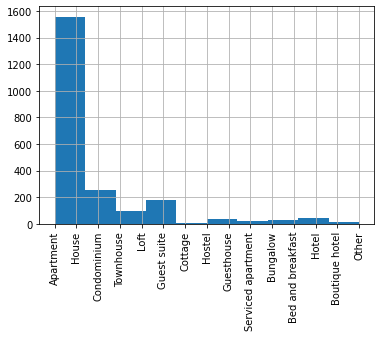

In [194]:
df['property_type'].hist()
plt.xticks(rotation = 90);

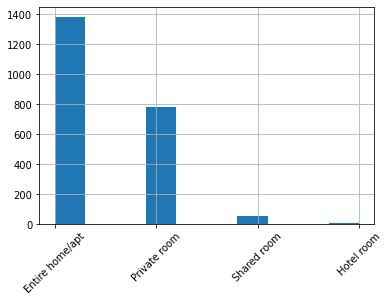

In [195]:
df['room_type'].hist()
plt.xticks(rotation = 45);

>2 bathrooms appears to be outliers.


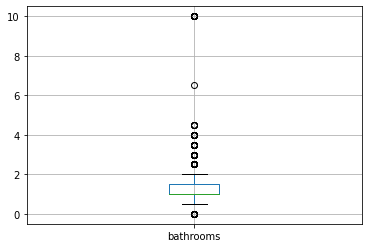

In [196]:
df.boxplot(column='bathrooms')
print(f'>2 bathrooms appears to be outliers.')

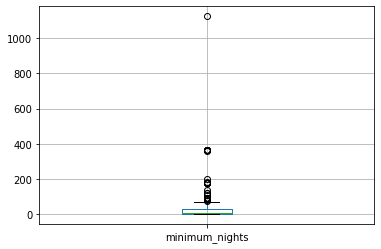

In [197]:
df.boxplot(column='minimum_nights')

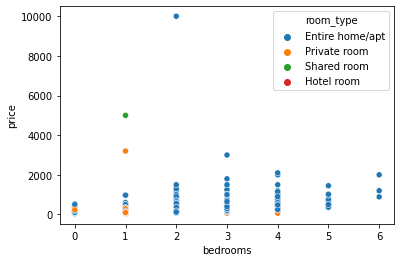

In [198]:
sns.scatterplot(data=df, x="bedrooms", y="price",hue = "room_type");

In [199]:
df.describe()

,bathrooms,bedrooms,minimum_nights,price
count,2222.000000,2222.000000,2222.000000,2222.000000
mean,1.354860,1.438344,16.021152,227.611611
std,0.917326,0.937741,35.814332,319.505827
min,0.000000,0.000000,1.000000,29.000000
25%,1.000000,1.000000,2.000000,109.000000
50%,1.000000,1.000000,4.000000,155.000000
75%,1.500000,2.000000,30.000000,250.000000
max,10.000000,6.000000,1125.000000,9999.000000


Outliers: bathrooms > 1.5, bedrooms > 2, minimum nights >30, price > 250. Should be noted that outlier for price doesnt no consider like to like comparison for minimum nights required. The price shown is the total cost for the minimum nights expected.

#Key Analysis + Visuals

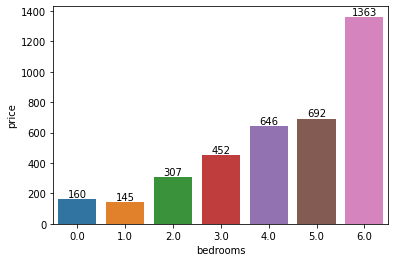

In [200]:
ax = sns.barplot(data=df, x='bedrooms', y = 'price',ci=None);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

#Source on Data Label: https://stackoverflow.com/questions/62002434/how-to-add-data-labels-to-seaborn-barplot

**Key Observation**: Average price and # of bedrooms are closely correlated. This is expected in real estate. More # of bedrooms tend to equates to higher prices.

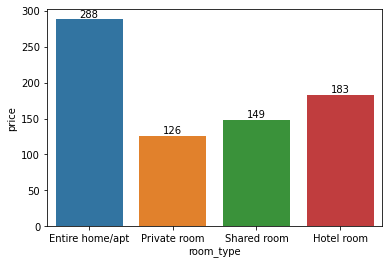

In [201]:
ax = sns.barplot(data=df, x='room_type', y = 'price',ci=None);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

**Key Observation**: This shows the average price by each Room Types. Renting out an entire home or apartment will likely be the most expensive option. Its quite interesting to see that shared room is cheaper than a private room. Hotel room is the second most expensive option as it is expected to offer the most privacy and space after an entire home/apartment. 

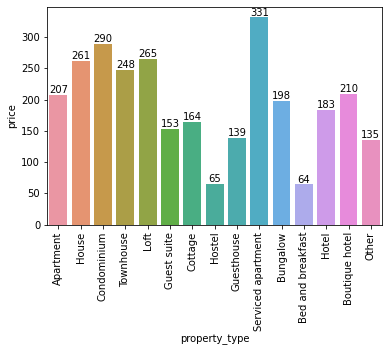

In [202]:
ax = sns.barplot(data=df, x='property_type', y = 'price',ci=None);
for p in ax.patches:
             ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.xticks(rotation=90);
plt.show()

**Key Observation**: This shows the average price expected by each property type. Based on the chart, Serviced apartment is the most expensive option. Hostels/Bed and breakfast types are least expensive. This aligns with the typical real estate/hospitality market.

#Model Selection Process

Classification or Regression?

The model I will be selecting will be solving a regression problem where the model will predict the price per night of the rental based on the rental's features.

Based on prior experiences and exercises, I will be using 3 regression models that I think have yielded the best result. The 3 models will be hypertuned and will also be tested with reduced features (by combining features) to find the best performing model.

1. Linear (Standard)
2. Random Tree 
3. KNN

Metrics for evaluating the Model:

* MAE: Mean absolute error measures the average of the absolute values of all of the errors our model makes. 

* MSE: Mean squared error is similar to mean absolute error, but it penalizes large errors more.

* RMSE: Root mean squared error is the square root of the mean squared error. Like the previous two metrics, a lower RMSE is better. 

* R^2: This score can be interpreted as saying that our model can account for about XX% of the variation in y_test using the features in X_test. (Not really a high priority measurement in this use case)

##Preparing Data for ML

In [203]:
df.head()

,property_type,room_type,bathrooms,bedrooms,minimum_nights,price
0,Apartment,Entire home/apt,1.0,1.0,1,170.0
1,House,Private room,1.0,1.0,1,99.0
2,Apartment,Entire home/apt,1.0,2.0,30,235.0
3,Apartment,Private room,4.0,1.0,32,65.0
4,Apartment,Private room,4.0,1.0,32,65.0


In [204]:
# Arrange Data into Features Matrix and Target Vector
y = df['price']
X = df.drop(columns = 'price')
# Split the data for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [205]:
# Instantiate the categorical and numeric column selectors to select appropriate columns
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Instantiate the Standard Scaler and the One hot encoder
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore') #this needs to be applied to property_type and room_type

In [206]:
num_processor = make_pipeline(scaler)
cat_processor = make_pipeline(ohe)

In [207]:
# Make tuples for preprocessing the categorical and numeric columns
num_tuple = (num_processor,num_selector)
cat_tuple = (cat_processor,cat_selector)

In [208]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [209]:
#function for score
def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE {mae},\nMSE {mse},\nRMSE: {rmse},\nR^2: {r2} ')

###Combining Features

In [210]:
df_copy = df.copy()

In [211]:
#reduce the room features to total rooms (combining two features)
df_copy['total_rooms'] = df_copy['bathrooms'] + df_copy['bedrooms']
df_copy.drop(columns = ['bathrooms','bedrooms'], inplace = True)
df_copy.head()

,property_type,room_type,minimum_nights,price,total_rooms
0,Apartment,Entire home/apt,1,170.0,2.0
1,House,Private room,1,99.0,2.0
2,Apartment,Entire home/apt,30,235.0,3.0
3,Apartment,Private room,32,65.0,5.0
4,Apartment,Private room,32,65.0,5.0


In [212]:
# Arrange Data into Features Matrix and Target Vector (a - Target, B - Features)
a = df_copy['price']
B = df_copy.drop(columns = 'price')
# Split the data for validation
B_train, B_test, a_train, a_test = train_test_split(B, a, random_state=42)

##Linear Model

In [213]:
lin_reg = LinearRegression()

In [214]:
#making the pipeline
lin_reg_pipe = make_pipeline(col_transformer, lin_reg)

In [215]:
#Fitting the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('linearregression', LinearRegression())])

In [216]:
train_ln_pred = lin_reg_pipe.predict(X_train)
test_ln_pred = lin_reg_pipe.predict(X_test)

In [217]:
#get the score of the model
print(f'Train Score')
eval_regression(y_train, train_ln_pred)
print(f'\n')
print(f'Test Score')
eval_regression(y_test, test_ln_pred)

Train Score
MAE 108.69765736498017,
MSE 77823.76643397246,
RMSE: 278.9691137634639,
R^2: 0.2803946964609092 


Test Score
MAE 114.78810207776533,
MSE 76730.67692698089,
RMSE: 277.0030269274704,
R^2: 0.08178193066727235 


###Linear Model - Tuning

Tuning is not needed for Linear Regression Model

####Linear Model - Reduced Features

In [218]:
lin_reg_r = LinearRegression()

In [219]:
#making the pipeline
lin_reg_r_pipe = make_pipeline(col_transformer, lin_reg_r)

In [220]:
#Fitting the model
lin_reg_r_pipe.fit(B_train, a_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('linearregression', LinearRegression())])

In [221]:
train_ln_r_pred = lin_reg_r_pipe.predict(B_train)
test_ln_r_pred = lin_reg_r_pipe.predict(B_test)

In [222]:
#get the score of the model
print(f'Train Score')
eval_regression(a_train, train_ln_r_pred)
print(f'\n')
print(f'Test Score')
eval_regression(a_test, test_ln_r_pred)

Train Score
MAE 110.16702129767619,
MSE 79384.76241632046,
RMSE: 281.753016694268,
R^2: 0.2659607897101499 


Test Score
MAE 117.39197114031182,
MSE 78461.76256646597,
RMSE: 280.11026858447366,
R^2: 0.061066433588441216 


##Random Tree

In [223]:
rf_reg = RandomForestRegressor(random_state = 42)

In [ ]:
rf_reg.get_params()

In [225]:
#making the pipeline
rf_reg_pipe = make_pipeline(col_transformer, rf_reg)

In [226]:
#Fitting the model
rf_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [227]:
train_rf_pred = rf_reg_pipe.predict(X_train)
test_rf_pred = rf_reg_pipe.predict(X_test)

In [228]:
#get the score of the model
print(f'Train Score')
eval_regression(y_train, train_rf_pred)
print(f'\n')
print(f'Test Score')
eval_regression(y_test, test_rf_pred)

Train Score
MAE 58.22174200873303,
MSE 19047.736017455056,
RMSE: 138.01353563131065,
R^2: 0.8238731882733735 


Test Score
MAE 115.08477144592095,
MSE 191868.23020957632,
RMSE: 438.02765918327157,
R^2: -1.2960422475743236 


###Random Tree - Tuned

In [ ]:
rf_reg_pipe.get_params()

In [230]:
rf_pipe_param_grid = {'randomforestregressor__max_depth': range(1,15),
              'randomforestregressor__n_estimators': [100, 150, 200, 250]}

In [231]:
rf_reg_pipe_gs = GridSearchCV(rf_reg_pipe, rf_pipe_param_grid)

rf_reg_pipe_gs.fit(X_train, y_train)
print('Best Lin Reg Parameter:')
print(rf_reg_pipe_gs.best_params_)

Best Lin Reg Parameter:
{'randomforestregressor__max_depth': 4, 'randomforestregressor__n_estimators': 100}


In [232]:
#Applying the new parameter
rf_reg_tuned = RandomForestRegressor(max_depth = 4, n_estimators = 100, random_state = 42)

In [233]:
#making the pipeline
rf_reg_tuned_pipe = make_pipeline(col_transformer, rf_reg_tuned)

In [234]:
#Fitting the model
rf_reg_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, random_state=42))])

In [235]:
train_rf_tuned_pred = rf_reg_tuned_pipe.predict(X_train)
test_rf_tuned_pred = rf_reg_tuned_pipe.predict(X_test)

In [236]:
#get the score of the model
print(f'Train Score')
eval_regression(y_train, train_rf_tuned_pred)
print(f'\n')
print(f'Test Score')
eval_regression(y_test, test_rf_tuned_pred)

Train Score
MAE 80.5916060545525,
MSE 29696.10619995261,
RMSE: 172.32558196609293,
R^2: 0.7254119596733172 


Test Score
MAE 114.65264143992941,
MSE 194022.88470039025,
RMSE: 440.4802886627167,
R^2: -1.321826494056562 


####Random Tree - Reduced Features

In [237]:
#Applying the new parameter
rf_reg_tuned_r = RandomForestRegressor(max_depth = 4, n_estimators = 100, random_state = 42)

In [238]:
#making the pipeline
rf_reg_tuned_r_pipe = make_pipeline(col_transformer, rf_reg_tuned_r)

In [239]:
#Fitting the model
rf_reg_tuned_r_pipe.fit(B_train, a_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=4, random_state=42))])

In [240]:
train_rf_tuned_r_pred = rf_reg_tuned_r_pipe.predict(B_train)
test_rf_tuned_r_pred = rf_reg_tuned_r_pipe.predict(B_test)

In [241]:
#get the score of the model
print(f'Train Score')
eval_regression(a_train, train_rf_tuned_r_pred)
print(f'\n')
print(f'Test Score')
eval_regression(a_test, test_rf_tuned_r_pred)

Train Score
MAE 85.44111923525585,
MSE 54078.209185620886,
RMSE: 232.5472192601341,
R^2: 0.4999603858946411 


Test Score
MAE 116.22162666177816,
MSE 186288.4013071083,
RMSE: 431.61140080761106,
R^2: -1.2292697397948498 


##KNeighbors

In [242]:
kn_reg = KNeighborsRegressor()

In [243]:
#making the pipeline
kn_reg_pipe = make_pipeline(col_transformer, kn_reg)

In [244]:
#Fitting the model
kn_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [245]:
train_kn_pred = kn_reg_pipe.predict(X_train)
test_kn_pred = kn_reg_pipe.predict(X_test)

In [246]:
#get the score of the model
print(f'Train Score')
eval_regression(y_train, train_kn_pred)
print(f'\n')
print(f'Test Score')
eval_regression(y_test, test_kn_pred)

Train Score
MAE 77.26914765906362,
MSE 62220.781176470584,
RMSE: 249.4409372506257,
R^2: 0.42466927294091916 


Test Score
MAE 101.54820143884892,
MSE 84118.44489208634,
RMSE: 290.0317997945852,
R^2: -0.006625761135743646 


###KNeighbors - Tuned

In [ ]:
kn_reg_pipe.get_params()

In [248]:
kn_pipe_param_grid = {'kneighborsregressor__n_neighbors':  range(10,50),
                      'kneighborsregressor__p': [1,2],
                      'kneighborsregressor__weights': ['uniform','distance']}

In [249]:
#find the best parameter
kn_reg_pipe_gs = GridSearchCV(kn_reg_pipe, kn_pipe_param_grid)

kn_reg_pipe_gs.fit(X_train, y_train)
print('Best kn Reg Parameter:')
print(kn_reg_pipe_gs.best_params_)

Best kn Reg Parameter:
{'kneighborsregressor__n_neighbors': 23, 'kneighborsregressor__p': 1, 'kneighborsregressor__weights': 'uniform'}


In [250]:
#Applying the new parameter
kn_reg_tuned = KNeighborsRegressor(n_neighbors = 23, p = 1, weights = 'uniform')

In [251]:
#making the pipeline
kn_reg_tuned_pipe = make_pipeline(col_transformer, kn_reg_tuned)

In [252]:
#Fitting the model
kn_reg_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=23, p=1))])

In [253]:
train_kn_tuned_pred = kn_reg_tuned_pipe.predict(X_train)
test_kn_tuned_pred = kn_reg_tuned_pipe.predict(X_test)

In [254]:
#get the scores of the model
print(f'Train Score')
eval_regression(y_train, train_kn_tuned_pred)
print(f'\n')
print(f'Test Score')
eval_regression(y_test, test_kn_tuned_pred)

Train Score
MAE 78.76097395479933,
MSE 78583.23369309916,
RMSE: 280.32701206465845,
R^2: 0.27337220586999755 


Test Score
MAE 88.00132937128558,
MSE 63338.127806639364,
RMSE: 251.6706733146303,
R^2: 0.24204743449472 


####KNeighbors - Reduced Features

In [255]:
#Applying the new parameter
kn_reg_tuned_r = KNeighborsRegressor(n_neighbors = 23, p = 1, weights = 'uniform')

In [256]:
#making the pipeline
kn_reg_tuned_r_pipe = make_pipeline(col_transformer, kn_reg_tuned_r)

In [257]:
#Fitting the model
kn_reg_tuned_r_pipe.fit(B_train, a_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c8769fa50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f3c876ca810>)])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_neighbors=23, p=1))])

In [258]:
train_kn_tuned_r_pred = kn_reg_tuned_r_pipe.predict(B_train)
test_kn_tuned_r_pred = kn_reg_tuned_r_pipe.predict(B_test)

In [259]:
print(f'Train Score')
eval_regression(a_train, train_kn_tuned_r_pred)
print(f'\n')
print(f'Test Score')
eval_regression(a_test, test_kn_tuned_r_pred)

Train Score
MAE 82.68299493710529,
MSE 80253.2545165514,
RMSE: 283.29005368447264,
R^2: 0.25793018993266115 


Test Score
MAE 90.43869252424147,
MSE 63724.46292040094,
RMSE: 252.43704744034886,
R^2: 0.23742425252264943 


#Chosen Production Model

Based on the score above, I've decided to choose KNeighbors as my chosen regressor model. Across the three models, KNeighbors model yielded the lowest MAE score as well as the lowest RMSE score. The reason I prioritized MAE and RMSE is because this is a price prediction and the lower the difference between prediction than the actual target the better. In the case of KNeighbors model, the score was less than 100. I've also tested the model with reduced feature to see if the score had improved. However, since there weren't a lot of features to in the dataset to begin with, it appears that reducing the number of features made the model less effective. *Please refer to the read me for all score comparison.*